In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from google.colab import drive
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset

In [42]:
x_train = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/x_train_log.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/x_test_log.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/y_train_log.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/y_test_log.csv')

In [39]:
train = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/train_full.csv')
y = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/y_full_log.csv')
# test = pd.read_csv('/content/drive/MyDrive/Project/Santander-value-prediction/Datasets/test_full.csv')

In [40]:
x_train

,20aa07010,4681de4fd,b8a716ebf,bd8f989f1,22ed6dba3,87ffda550,822e49b95,472cd130b,3e0e55648,64534cc93,...,6df033973,23310aa6f,1189ee335,ea5ed6ff7,b1bb8eac3,2a879b4f7,6b119d8ce,5831f4c76,3ecc09859,8675bec0b
0,12.948012,12.793862,0.000000,0.000000,0.000000,14.495573,0.000000,0.000000,0.0,0.000000,...,0.000000,12.948012,0.0,0.000000,0.000000,0.0,11.695255,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,14.508658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,11.849405,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
2,15.201805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,15.341567,0.000000,0.000000,14.151984,16.257858,15.955577,0.000000,13.186904,0.0,0.000000,...,13.815512,0.000000,0.0,13.556309,0.000000,0.0,0.000000,0.00000,0.000000,15.392425
3117,16.993564,17.216708,0.000000,0.000000,0.000000,16.811243,17.727534,0.000000,0.0,17.216708,...,0.000000,17.727534,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
3118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,16.844033,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
3119,15.201805,16.624913,13.122365,0.000000,13.437176,0.000000,0.000000,0.000000,0.0,12.899222,...,0.000000,12.765691,0.0,0.000000,0.000000,0.0,0.000000,0.00000,17.994196,0.000000


In [43]:
y_test

,target
0,16.118096
1,15.894952
2,15.312153
3,12.206078
4,14.786290
...,...
1333,12.429220
1334,16.705882
1335,12.019749
1336,16.042294


In [44]:
y_test1 = y_test["target"]
y_train1 = y_train["target"]

In [6]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.6 MB/s eta 0:00:00


In [64]:
import shap

In [68]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getter function for adjusted R-squared

In [10]:
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adj_r2

Getter function for the rmsle

In [108]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.exp(y_true), np.exp(y_pred)))

Getter function for sample_submission csv submission

In [ ]:
def create_sample_sub(model, train, test, y, x_train):
  # Predict on the validation data
  model_y_pred = model.predict(test[x_train.columns])
  # Create a new DataFrame
  df_new = pd.DataFrame()
  df_new['ID'] = test['ID']
  df_new['y'] = model_y_pred
  return df_new

## 1) Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
print("--------Random Forest_CV--------")

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, x_train, y_train["target"], cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

adj_r2_scores = cross_val_score(rf_regressor, x_train, y_train["target"], cv=5, scoring='r2')
# Multiply the scores by -1 to obtain positive R-squared values
positive_r2_scores = -adj_r2_scores

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Calculate the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(positive_r2_scores)
std_r2 = np.std(positive_r2_scores)

print("CV RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Std RMSE:", std_rmse)

print("CV R^2 scores:", -positive_r2_scores)
print("Mean R^2:", -mean_r2)
print("Std R^2:", std_r2)

--------Random Forest_CV--------
CV RMSE scores: [7395950.25302382 7247619.96741107 7597408.9010648  7454633.52203423
 7013196.07380001]
Mean RMSE: 7341761.743466785
Std RMSE: 198922.08295482708
CV R^2 scores: [0.26384079 0.14679996 0.3103278  0.26866877 0.13006204]
Mean R^2: 0.2239398706110159
Std R^2: 0.07185992894916526


In [112]:
print("--------RF--------")
# create and fit the model
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train, y_train1)
end_time = time.time()
# predict on the test set
y_pred = rf_reg.predict(x_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test1, y_pred)

# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test, y_pred, x_test.shape[1])

rmsle_score = rmsle(y_test, y_pred)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------RF--------
Training time: 72.108 seconds
Mean Squared Error: 2.102
Root Mean Squared Error: 1.4498
Adjusted R^2: 0.46076
Root Mean Squared Logarithmic Error: 1.44981


In [113]:
print("--------RF--------")
# create and fit the model
start_time = time.time()
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42,
                               max_depth = 5, min_samples_split = 600,
                               min_samples_leaf = 20)
rf_reg.fit(x_train, y_train1)
end_time = time.time()
# predict on the test set
y_pred = rf_reg.predict(x_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test1, y_pred)

# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test, y_pred, x_test.shape[1])

rmsle_score = rmsle(y_test1, y_pred)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------RF--------
Training time: 41.022 seconds
Mean Squared Error: 2.5289
Root Mean Squared Error: 1.5902
Adjusted R^2: 0.75746
Root Mean Squared Logarithmic Error: 1.59024


Feature Importance for the Random Forest

       Feature  Importance
587  f190486d6    0.359365
329  58e2e02e6    0.104258
571  15ace8c9f    0.093259
367  9fd594eec    0.071978
20   186b87c05    0.038160
0    20aa07010    0.026873
335  2c136905e    0.019436
106  6786ea46d    0.013918
502  58232a6fb    0.013819
396  cd8048913    0.012830


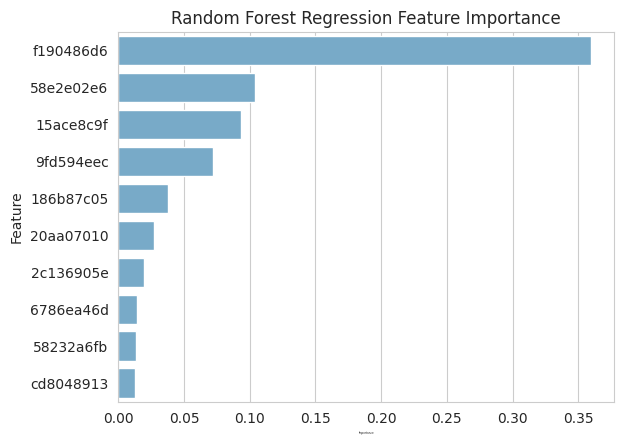

In [98]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = rf_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Random Forest Regression Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

## 2) LGBM

In [100]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [11]:
print("--------LGBM_CV--------")
# Define a custom scoring function to calculate adjusted R-squared
def adj_r2_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    adj_r2 = adj_r2_score(y, y_pred, X.shape[1])
    return adj_r2

# Create a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lgb_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

adj_r2_scores = cross_val_score(lgb_regressor, x_train, y_train, cv=5, scoring='r2')
# Multiply the scores by -1 to obtain positive R-squared values
positive_r2_scores = -adj_r2_scores

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Calculate the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(positive_r2_scores)
std_r2 = np.std(positive_r2_scores)

print("CV RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Std RMSE:", std_rmse)

print("CV R^2 scores:", -positive_r2_scores)
print("Mean R^2:", -mean_r2)
print("Std R^2:", std_r2)

--------LGBM_CV--------
CV RMSE scores: [7500581.97069188 7252223.33882843 7709200.01112408 7547518.79038252
 6818783.93637654]
Mean RMSE: 7365661.609480692
Std RMSE: 310237.84492127923
CV R^2 scores: [0.24286433 0.14571578 0.28988229 0.25033035 0.17762447]
Mean R^2: 0.22128344236534234
Std R^2: 0.05221462808772765


Naive LGBM

In [116]:
print("--------LGBM--------")
# Create a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(random_state = 42)
start_time = time.time()
lgb_regressor.fit(x_train, y_train)
end_time = time.time()
# Make predictions on the test data
y_pred1 = lgb_regressor.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred1)

# Calculate the R^2
r2 = r2_score(y_test1, y_pred1)

# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred1, x_test.shape[1])

rmsle_score = rmsle(y_test1, y_pred1)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------LGBM--------
Training time: 2.5172 seconds
Mean Squared Error: 2.1272
Root Mean Squared Error: 1.4585
Adjusted R^2: 0.4783
Root Mean Squared Logarithmic Error: 1.45849


LGBM with parameters

In [115]:
print("--------LGBM--------")
import lightgbm as lgb
# Initialise the lgbm params
params = {
    "objective": "regression",
    "metric" : "rmse",
    "num_leaves" : 100,
    "learning_rate" : 0.001,
    "bagging_fraction" : 0.6,
    "feature_fraction" : 0.6,
    "bagging_seed" : 42,
    "verbosity" : -1,
    "seed" : 42
}


# Create a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(**params)
start_time = time.time()
lgb_regressor.fit(x_train, y_train,
                  eval_set = [(x_test, y_test1)],
                  early_stopping_rounds = 100,
                  verbose = 150)
end_time = time.time()
# Make predictions on the test data
y_pred1 = lgb_regressor.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred1)

# Calculate the R^2
r2 = r2_score(y_test1, y_pred1)

# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred1, x_test.shape[1])

rmsle_score = rmsle(y_test1, y_pred1)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------LGBM--------
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


Training time: 3.8443 seconds
Mean Squared Error: 2.8286
Root Mean Squared Error: 1.6819
Adjusted R^2: 0.96577
Root Mean Squared Logarithmic Error: 1.68185


Feature Importance for LGBM

       Feature  Importance
587  f190486d6          55
487  eeb9cd3aa          38
329  58e2e02e6          35
0    20aa07010          34
378  fb0f5dbfe          32
192  024c577b9          30
571  15ace8c9f          30
107  6eef030c1          27
186  b43a7cfd5          27
367  9fd594eec          24


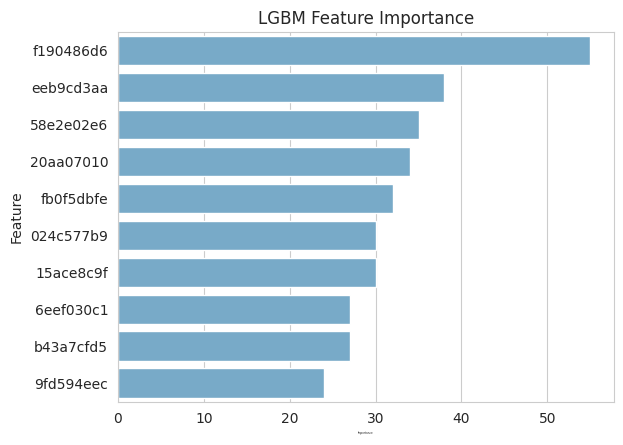

In [117]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = lgb_regressor.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('LGBM Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

## 3) XGBOOST

In [16]:
import xgboost as xgb

In [47]:
print("--------XGBoost_CV--------")

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42, verbosity=0)

# Perform cross-validation
cv_scores = cross_val_score(xgb_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

adj_r2_scores = cross_val_score(xgb_regressor, x_train, y_train, cv=5, scoring='r2')
# Multiply the scores by -1 to obtain positive R-squared values
positive_r2_scores = -adj_r2_scores

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Calculate the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(positive_r2_scores)
std_r2 = np.std(positive_r2_scores)

print("CV RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Std RMSE:", std_rmse)

print("CV R^2 scores:", -positive_r2_scores)
print("Mean R^2:", -mean_r2)
print("Std R^2:", std_r2)

--------XGBoost_CV--------
CV RMSE scores: [1.51328964 1.54534844 1.57282113 1.5289094  1.4840166 ]
Mean RMSE: 1.5288770435657488
Std RMSE: 0.029859058547278362
CV R^2 scores: [0.30663304 0.18571941 0.23251614 0.24604315 0.26020131]
Mean R^2: 0.24622260857837466
Std R^2: 0.039225911835033433


Naive XGBoost implementation

In [118]:
import xgboost as xgb
print("--------XGBoost--------")
# Instantiate an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state = 42)
start_time = time.time()
# Train the model on the training data
xgb_reg.fit(x_train, y_train)
end_time = time.time()
# Predict the target values for the test data
y_pred2 = xgb_reg.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred2)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred2, x_test.shape[1])

rmsle_score = rmsle(y_test1, y_pred2)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------XGBoost--------
Training time: 12.953 seconds
Mean Squared Error: 2.3321
Root Mean Squared Error: 1.5271
Adjusted R^2: 0.62067
Root Mean Squared Logarithmic Error: 1.52710


XGBoost with parameters stated

Getter function

In [119]:
def run_xgb(train_X, train_y, val_X, val_y):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    start_time = time.time()
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False,
                          early_stopping_rounds = 30, verbose_eval=100)
    end_time = time.time()

    # Predict the target values for the test data
    y_pred2 = model_xgb.predict(va_data)

    # Calculate the RMSE
    mse = mean_squared_error(y_test1, y_pred2)
    # calculate adjusted R^2
    adj_r2 = adj_r2_score(y_test1, y_pred2, x_test.shape[1])
    
    rmsle_score = rmsle(y_test1, y_pred2)
    print('Training time: {:.5} seconds'.format(end_time - start_time))
    print("Mean Squared Error: {:.5}".format(mse))
    print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
    print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
    print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")
    # dtest = xgb.DMatrix(test_X)
    # xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return model_xgb

In [120]:
model_xgb = run_xgb(x_train, y_train1, x_test, y_test1)
print("XGB Training Completed...")

[09:28:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:14.03492	valid-rmse:14.01814


Pass `evals` as keyword args.


[100]	train-rmse:8.60969	valid-rmse:8.58714
[200]	train-rmse:5.36380	valid-rmse:5.35832
[300]	train-rmse:3.42852	valid-rmse:3.48889
[400]	train-rmse:2.27960	valid-rmse:2.44431
[500]	train-rmse:1.61086	valid-rmse:1.89776
[600]	train-rmse:1.23237	valid-rmse:1.63964
[700]	train-rmse:1.01978	valid-rmse:1.52547
[800]	train-rmse:0.89839	valid-rmse:1.47645
[900]	train-rmse:0.82379	valid-rmse:1.45515
[1000]	train-rmse:0.77520	valid-rmse:1.44537
[1100]	train-rmse:0.73793	valid-rmse:1.44071
[1200]	train-rmse:0.70695	valid-rmse:1.43771
[1300]	train-rmse:0.68013	valid-rmse:1.43605
[1353]	train-rmse:0.66714	valid-rmse:1.43574
Training time: 233.95 seconds
Mean Squared Error: 2.0614
Root Mean Squared Error: 1.4357
Adjusted R^2: 0.43255
Root Mean Squared Logarithmic Error: 1.43574
XGB Training Completed...


Observations
* The parameters tuned model has lower RMSE and lower adjusted R^2 scores compared to the naive implementation.
* We will use the naive model xgboost as an implementation.

Feature Importance for XGBoost

       Feature  Importance
335  2c136905e    0.046715
666  896d1c52d    0.025101
20   186b87c05    0.016527
573  82f715995    0.012885
369  e78e3031b    0.009585
553  2288333b4    0.008906
587  f190486d6    0.008770
291  715fa74a4    0.008565
195  7ab926448    0.008436
570  62e59a501    0.007792


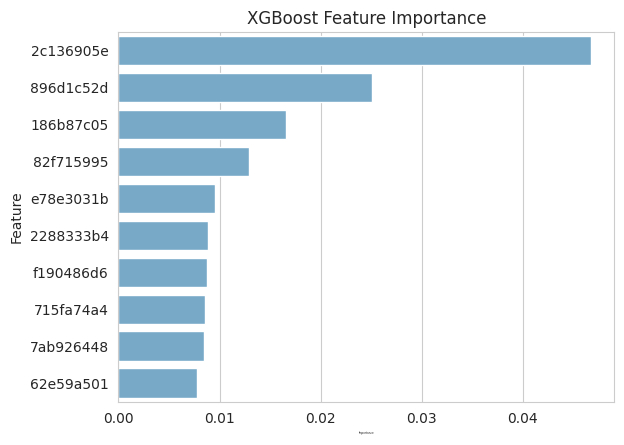

In [121]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = xgb_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

## 4) Catboost

In [72]:
from catboost import CatBoostRegressor

In [105]:
print("--------CatBoost_CV--------")

# Create a CatBoost regressor
catboost_regressor = CatBoostRegressor(random_state=42, verbose=False)

# Perform cross-validation
cv_scores = cross_val_score(catboost_regressor, x_train, y_train, cv=5,
                            scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

adj_r2_scores = cross_val_score(catboost_regressor, x_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Calculate the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(positive_r2_scores)
std_r2 = np.std(positive_r2_scores)

print("CV RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Std RMSE:", std_rmse)

print("CV R^2 scores:", adj_r2_scores)
print("Mean R^2:", mean_r2)
print("Std R^2:", std_r2)

--------CatBoost_CV--------
CV RMSE scores: [1.46503383 1.46367967 1.47735555 1.45147218 1.42875331]
Mean RMSE: 1.4572589060751242
Std RMSE: 0.016441444600552933
CV R^2 scores: [0.35014819 0.2695116  0.32285662 0.32048286 0.31427412]
Mean R^2: -0.24622260857837466
Std R^2: 0.039225911835033433


Naive Catboost

In [122]:
print("--------CatBoost--------")

# Initialize the CatBoostRegressor model
cat_reg = CatBoostRegressor(random_seed=42, loss_function='RMSE')
start_time = time.time()
# Fit the model on the training data
cat_reg.fit(x_train, y_train1, verbose = 100)
end_time = time.time()

# Predict on the validation data
y_pred4 = cat_reg.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred4)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred4, x_test.shape[1])
rmsle_score = rmsle(y_test1, y_pred4)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------CatBoost--------
Learning rate set to 0.049009
0:	learn: 1.7542626	total: 301ms	remaining: 5m
100:	learn: 1.4341593	total: 13.2s	remaining: 1m 57s
200:	learn: 1.3252385	total: 25.8s	remaining: 1m 42s
300:	learn: 1.2378074	total: 38.5s	remaining: 1m 29s
400:	learn: 1.1762166	total: 51.2s	remaining: 1m 16s
500:	learn: 1.1215810	total: 1m 4s	remaining: 1m 3s
600:	learn: 1.0701328	total: 1m 17s	remaining: 51.2s
700:	learn: 1.0295429	total: 1m 30s	remaining: 38.5s
800:	learn: 1.0012313	total: 1m 43s	remaining: 25.6s
900:	learn: 0.9717916	total: 1m 56s	remaining: 12.8s
999:	learn: 0.9443229	total: 2m 9s	remaining: 0us
Training time: 129.93 seconds
Mean Squared Error: 2.1151
Root Mean Squared Error: 1.4543
Adjusted R^2: 0.46989
Root Mean Squared Logarithmic Error: 1.45433


Catboost with parameter adjusted

In [123]:
print("--------CatBoost--------")

# Initialize the CatBoostRegressor model
cat_reg1 = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=5,
                            random_seed=42, loss_function='RMSE')
start_time = time.time()
# Fit the model on the training data
cat_reg1.fit(x_train, y_train1, verbose = 100)
end_time = time.time()

# Predict on the validation data
y_pred4 = cat_reg1.predict(x_test)

# Calculate the RMSE
mse = mean_squared_error(y_test1, y_pred4)
# calculate adjusted R^2
adj_r2 = adj_r2_score(y_test1, y_pred4, x_test.shape[1])

# calculate the rmsle score
rmsle_score = rmsle(y_test1, y_pred4)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print("Mean Squared Error: {:.5}".format(mse))
print("Root Mean Squared Error: {:.5}".format(np.sqrt(mse)))
print('Adjusted R^2: {:.5}'.format(np.abs(adj_r2)))
print(f"Root Mean Squared Logarithmic Error: {rmsle_score:.5f}")

--------CatBoost--------
0:	learn: 1.7488736	total: 118ms	remaining: 1m 57s
100:	learn: 1.3504200	total: 8.84s	remaining: 1m 18s
200:	learn: 1.2177321	total: 17.5s	remaining: 1m 9s
300:	learn: 1.1238848	total: 24.6s	remaining: 57.2s
400:	learn: 1.0537708	total: 33.2s	remaining: 49.6s
500:	learn: 0.9993489	total: 40.2s	remaining: 40s
600:	learn: 0.9535737	total: 48.8s	remaining: 32.4s
700:	learn: 0.9181838	total: 57.3s	remaining: 24.4s
800:	learn: 0.8870095	total: 1m 4s	remaining: 16s
900:	learn: 0.8561642	total: 1m 12s	remaining: 8s
999:	learn: 0.8286011	total: 1m 20s	remaining: 0us
Training time: 80.545 seconds
Mean Squared Error: 2.1782
Root Mean Squared Error: 1.4759
Adjusted R^2: 0.51373
Root Mean Squared Logarithmic Error: 1.47586


Feature importance for CatBoost

       Feature  Importance
587  f190486d6    5.593606
487  eeb9cd3aa    2.984974
571  15ace8c9f    2.423355
329  58e2e02e6    2.397438
367  9fd594eec    1.993190
295  58e056e12    1.855663
378  fb0f5dbfe    1.731163
592  f74e8f13d    1.653310
0    20aa07010    1.578334
186  b43a7cfd5    1.513426


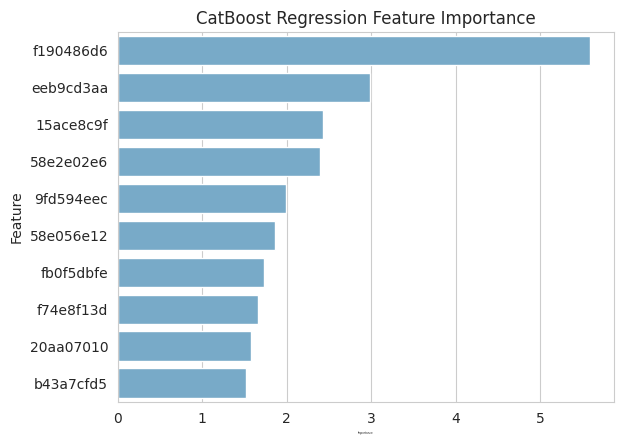

In [124]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = cat_reg.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('CatBoost Regression Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()